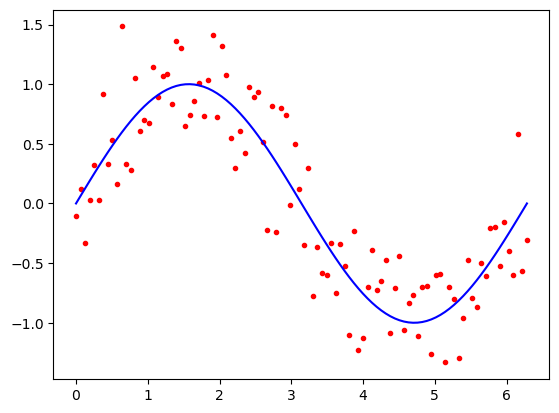

In [2]:
#PROGRAM 9 (REGRESSTION)

from math import ceil
import numpy as np
from scipy import linalg

def lowess(x,y,f,iterations):
    n=len(x)
    r=int(ceil(f*n))
    h=[np.sort(np.abs(x-x[i]))[r] for i in range(n)]
    w=np.clip(np.abs(x[:,None]-x[None,:])/h,0.0,1.0)
    w=(1-w**3)**3
    yest=np.zeros(n)
    delta=np.ones(n)
    
    for iteration in range(iterations):
        for i in range(n):
            weights=delta*w[:,i]
            b=np.array([np.sum(weights*y)],np.sum(weights*y*x))
            A=np.array([[np.sum(weights),np.sum(weights*x)],[np.sum(weights*x),np.sum(weights*x*x)]])
            beta=linalg.solve(A,b)
            yest[i]=beta[0]+beta[1]*x[i]
            
        residuals= y-yest
        s= np.median(np.abs(residuals))
        delta=np.clip(residuals/(6.0*s),-1,1)
        delta=(1-delta**2)**2
        
        return yest
    
import math
n=1000
x=np.linspace(0,2*math.pi,n)
y=np.sin(x)+0.3*np.random.randn(n)
f=0.25
iterations=3

#SCAMA 
import matplotlib.pyplot as plt
plt.plot(x,y,"r.", label= "orig data")
plt.plot(x,np.sin(x),'b-', label = "ls")
plt.legend()

In [16]:
#Program 8 (KNN)
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

dataset=load_iris()
X_test,X_train,y_test,y_train=train_test_split(dataset['data'],dataset['target'],random_state=0)

kn=KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train,y_train)

for i in range(len(X_test)):
    x=X_test[i]
    x_new=np.array([x])
    prediction=kn.predict(x_new)
    print("TARGET=",y_test[i],dataset['target_names'][y_test[i]],"PREDICTED=",prediction,dataset['target_names'][prediction])
print(kn.score(X_test,y_test))

TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 2 virginica PREDICTED= [2] ['virginica']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 2 virginica PREDICTED= [2] ['virginica']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 2 virginica PREDICTED= [2] ['virginica']
TARGET= 2 virginica PREDICTED= [2] ['virginica']
TARGET= 2 virginica PREDICTED= [1] ['versicolor']
TARGET= 2 virginica PREDICTED= [2] ['virginica']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 2 virginica PREDICTED= [2] ['virginica']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 2 virginica PREDICTED= [2] ['virginica']
TARGET= 2 virginica PREDICTED= [1] ['versicolor']
TARGET= 2 virginica PREDICTED= [1] ['versicolor']
TARGET= 2 virginica PREDICTED= [2] ['virginica']
TARGET= 1 versicolor PR

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'GMM')

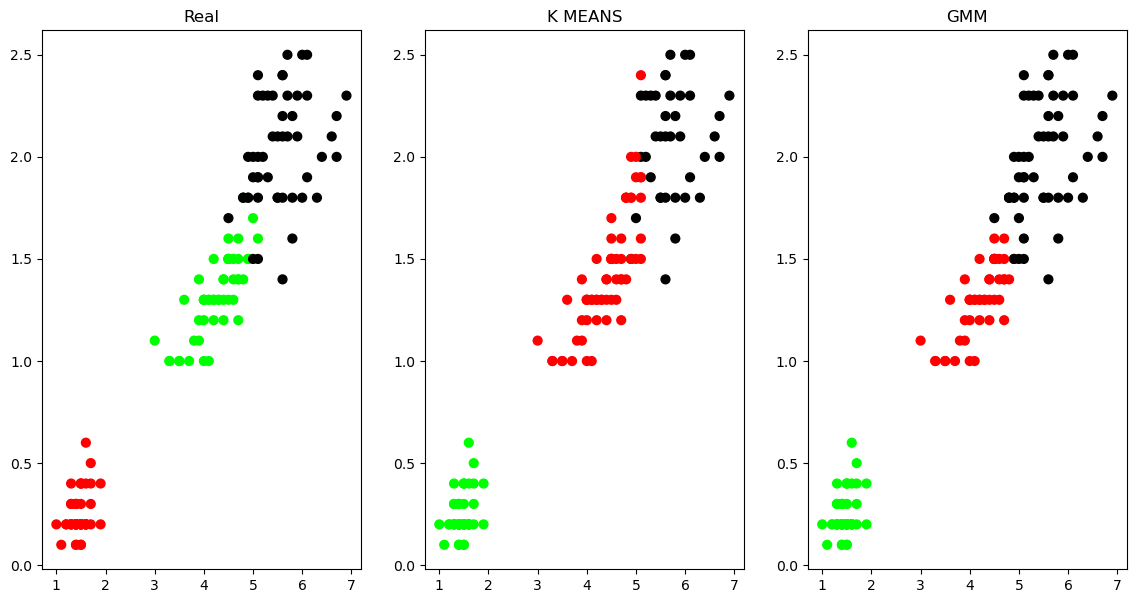

In [2]:
#Program 7 (K MEANS)
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset=load_iris()
x=pd.DataFrame(dataset.data)
x.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=pd.DataFrame(dataset.target)
y.columns=['Targets']

plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])

plt.subplot(1,3,1)
plt.scatter(x.Petal_Length,x.Petal_Width,c=colormap[y.Targets],s=40)
plt.title("Real")


plt.subplot(1,3,2)
model=KMeans(n_clusters=3)
model.fit(x)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)
plt.scatter(x.Petal_Length,x.Petal_Width,c=colormap[predY],s=40)
plt.title("K MEANS")

plt.subplot(1,3,3)
scaler=preprocessing.StandardScaler()
scaler.fit(x)
xsa=scaler.transform(x)
xs=pd.DataFrame(xsa,columns=x.columns)
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
y_cluster=gmm.predict(xs)
plt.scatter(x.Petal_Length,x.Petal_Width,c=colormap[y_cluster],s=40)
plt.title("GMM")


In [13]:
#Program 6 (Naive Bayes)
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

data=pd.read_csv("tennisdata.csv")
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

le=LabelEncoder()
x.Outlook=le.fit_transform(x.Outlook)
x.Temperature=le.fit_transform(x.Temperature)
x.Humidity=le.fit_transform(x.Humidity)
x.Windy=le.fit_transform(x.Windy)

le=LabelEncoder()
y=le.fit_transform(y)

print(x.head())
print("\nNow the train data output is:",y)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

classifier=GaussianNB()
classifier.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
print("Accuracy is:",accuracy_score(classifier.predict(X_test),y_test))

   Outlook  Temperature  Humidity  Windy
0        2            1         0      0
1        2            1         0      1
2        0            1         0      0
3        1            2         0      0
4        1            0         1      0

Now the train data output is: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
Accuracy is: 0.6666666666666666


In [31]:
#Program 5 (Back Propogation)
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)     # X = (hours sleeping, hours studying)
y = np.array(([92], [86], [89]), dtype=float)           # y = score on test
# scale units
X = X/np.amax(X, axis=0)        # maximum of X array
y = y/100  

class Neural_Network(object):
    def __init__(self):
        self.inpSize=2
        self.hidSize=3
        self.opSize=1
        
        self.w1=np.random.randn(self.inpSize,self.hidSize)
        self.w2=np.random.randn(self.hidSize,self.opSize)
        
        
    def forward(self, X):
        self.z=np.dot(X,self.w1)
        self.z2=self.sigmoid(self.z)
        self.z3=np.dot(self.z2,self.w2)
        o=self.sigmoid(self.z3)
        return o

    def backward(self, X,y,o):
        self.o_error=y-o
        self.o_delta=self.o_error*self.sigmoid_prime(o)
        self.z2_error=self.o_delta.dot(self.w2.T)
        self.z2_delta=self.z2_error*self.sigmoid_prime(self.z2)
        
        self.w1+=X.T.dot(self.z2_delta)
        self.w2+=self.z2.T.dot(self.o_delta)
        
    def sigmoid(self,s):
        return 1/(1+np.exp(-s))
    
    def sigmoid_prime(self,s):
        return s*(1-s)
    
    def train(self,X,y):
        o=self.forward(X)
        self.backward(X,y,o)
        
NN = Neural_Network()
print ("\nInput: \n" + str(X))
print ("\nActual Output: \n" + str(y)) 
print ("\nPredicted Output: \n" + str(NN.forward(X)))
print ("\nLoss: \n" + str(np.mean(np.square(y - NN.forward(X)))))     # mean sum squared loss)
NN.train(X, y)


Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.30762783]
 [0.31989919]
 [0.2786753 ]]

Loss: 
0.3468088156992832



The data values are:      Outlook Temperature Humidity  Windy
0     Sunny         Hot     High  False
1     Sunny         Hot     High   True
2  Overcast         Hot     High  False
3     Rainy        Mild     High  False
4     Rainy        Cool   Normal  False

The Output values are:  0     No
1     No
2    Yes
3    Yes
4    Yes
Name: PlayTennis, dtype: object

Now the Train data is
    Outlook  Temperature  Humidity  Windy
0        2            1         0      0
1        2            1         0      1
2        0            1         0      0
3        1            2         0      0
4        1            0         1      0

Now the Train data is
 [0 0 1 1 1 0 1 0 1 1 1 1 1 0]

For input ['Rainy', 'Mild', 'High', 'False'], we obtain True


C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


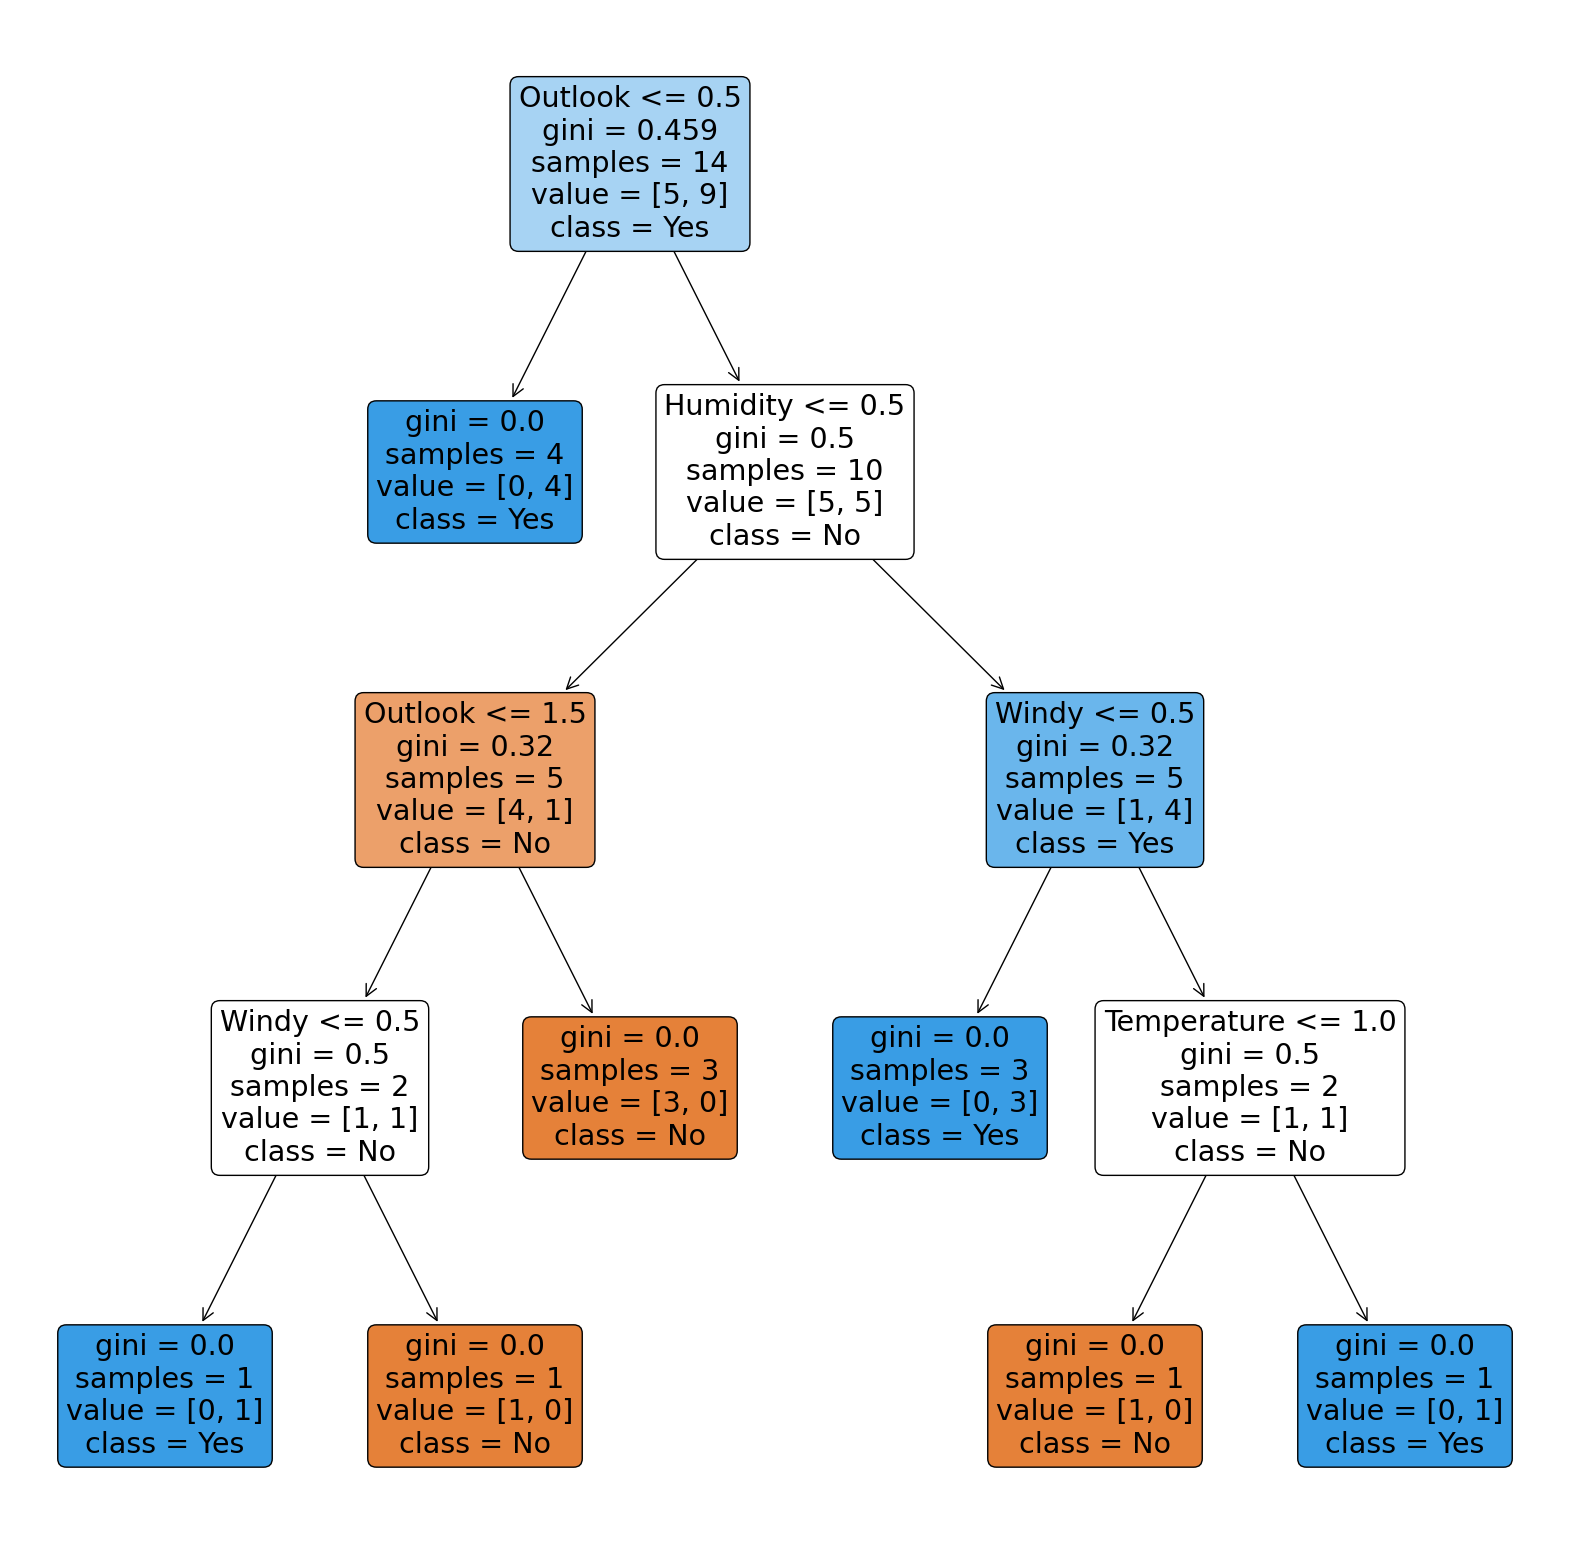

In [27]:
#Program 4 (ID3)
# Import necessary libraries

import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv('tennisdata.csv')

# Obtain Train data and Train output
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

print("\nThe data values are: ",X.head())
print("\nThe Output values are: ",y.head())

# Convert them into numbers
le = LabelEncoder()
X.Outlook = le.fit_transform(X.Outlook)
X.Temperature = le.fit_transform(X.Temperature)
X.Humidity = le.fit_transform(X.Humidity)
X.Windy = le.fit_transform(X.Windy)


ly = LabelEncoder()
y = ly.fit_transform(y)

## Train model
classifier = DecisionTreeClassifier()
classifier.fit(X, y)

print("\nNow the Train data is\n", X.head())
print("\nNow the Train data is\n", y)


def trans_list(list1):
    transf=[
        le_Outlook.transform([list1[0]])[0],
        le_Temperature.transform([list1[1]])[0],
        le_Humidity.transform([list1[2]])[0],
        le_Windy.transform([list1[3]])[0]
    ]
    return transf

## predict for an input
inp1 = ["Rainy", "Mild", "High", "False"]
pred1 = trans_list(inp1)
y_pred = classifier.predict([pred1])

print("\nFor input {0}, we obtain {1}".format(inp1, le.inverse_transform(y_pred)[0]))

plt.figure(figsize=(20,20))
tree.plot_tree(classifier, filled=True, feature_names=list(X.columns), class_names=list(ly.classes_), rounded=True)
plt.show()

In [28]:
#Program 3 (Candidate)
import numpy as np
import pandas as pd


data = pd.DataFrame(data=pd.read_csv('trainingdata.csv'))
print(data)


concepts = np.array(data.iloc[:,:-1])
print(concepts)

target = np.array(data.iloc[:,-1])
print(target)

def learn(concepts, target):
    
    specific_h = concepts[0].copy()
    print("\nInitialization of specific_h and general_h")
    print(specific_h)

    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print(general_h)

    
    for i, h in enumerate(concepts):
        if target[i] == "Yes":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
        if target[i] == "No":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h2 = '?'

        print("\nSteps of Candidate Elimination Algorithm",i+1)
        print(specific_h)
        print(general_h)
    
    indices = [i for i,val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h

s_final, g_final = learn(concepts, target)
print("\nFinal Specific_h:", s_final)
print("\nFinal General_h:", g_final)

     sky airTemp humidity    wind water forecast enjoySport
0  Sunny    Warm   Normal  Strong  Warm     Same        Yes
1  Sunny    Warm     High  Strong  Warm     Same        Yes
2  Rainy    Cold     High  Strong  Warm   Change         No
3  Sunny    Warm     High  Strong  Cool   Change        Yes
[['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
 ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
 ['Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
 ['Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change']]
['Yes' 'Yes' 'No' 'Yes']

Initialization of specific_h and general_h
['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Steps of Candidate Elimination Algorithm 1
['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], 

In [8]:
def astar(start, stop):
    open_set = set([start])
    closed_set = set()
    g = {start: 0}
    parents = {start: start}

    while open_set:
        n = None
        for v in open_set:
            if n is None or g[v] + heur(v) < g[n] + heur(n):
                n = v

        if n is None:
            print('Path does not exist')
            return None

        if n == stop:
            path = []
            while parents[n] != n:
                path.append(n)
                n = parents[n]
            path.append(start)
            path.reverse()
            print(path)
            return path

        open_set.remove(n)
        closed_set.add(n)

        if n in graph:
            for m, weight in get_neighbors(n):
                if m not in open_set and m not in closed_set:
                    open_set.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight
                elif g[m] > g[n] + weight:
                    g[m] = g[n] + weight
                    parents[m] = n
                    if m in closed_set:
                        closed_set.remove(m)
                        open_set.add(m)

    print('Path does not exist')
    return None

def get_neighbors(v):
    if v in graph:
        return graph[v]
    else:
        return None

def heur(n):
    H = {'A': 1, 'B': 1, 'C': 1, 'D': 1}
    return H[n]

graph = {'A': [('B', 1), ('C', 3), ('D', 7)], 'B': [('D', 5)], 'C': [('D', 12)]}
astar('A', 'D')

['A', 'B', 'D']


['A', 'B', 'D']